In [2]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pylab as P
import seaborn as sns
from collections import Counter
import matplotlib.image as image

#für bar chart aus https://stackoverflow.com/questions/23317150/python-matplotlib-legend-shows-first-entry-of-a-list-only
from itertools import cycle, islice
import matplotlib.ticker as mtick


df = pd.read_csv('data_prestudy.csv', encoding = 'utf-8', sep=';' )

real = df.loc[:0]
data = df.loc[1:]


# Fix missing font:

Install fonts included in the folder of this project

In [3]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

from matplotlib import rc
rc('font', **{'serif': ['cmunss']})
rc('text', usetex=True)

SMALL_SIZE = 11
X_TICK_SIZE = 12
MEDIUM_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=X_TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Legende:
'L' :     Lange Vib. richtig interpretiert

'S' :     Kurze Vib. richtig interpretiert

'L(S)':   Kurze Vib. wird für lange gehalten

'S(L)':   Lange Vib. wird für kurze gehalten

'X(S/L)': Kurze/lange Vibration nicht wahrgenommen

'P(S/L)': PhantomVibration (Vibration zum Zeitpunkt wahrgenommen, zu dem keine war)


In [4]:
def calc_occurence(a):
    occurrence = []
    for i in a:
        values = i.split('-')
        for j in values:
            occurrence.append(j)
            
    return Counter(occurrence)

def calc_perceived(a, amount_vib):
    occurence = calc_occurence(a)
    # correctly guessed vibrations
    correct = occurence['S'] + occurence['L']
    # wrongly guessed but at right time ==> perceived
    wrong = occurence['S(L)'] + occurence['L(S)']
    return (correct + wrong)/amount_vib

def calc_correctly_interpreted(a, amount_vib):
    occurence = calc_occurence(a)
    return (occurence['S'] + occurence['L'])/amount_vib

In [5]:
amount_vib = [100, 110, 130]
perceived = []
correct = []

d1 = data['1_Kontrolle'].append(data['2_Kontrolle'])
p = calc_perceived(d1,amount_vib[0])
c = calc_correctly_interpreted(d1,amount_vib[0])

perceived.append(p)
correct.append(c)

print(p)
print(c)

calc_occurence(d1)

d4 = data['7_Kontrolle'].append(data['8_Kontrolle'])
p = calc_perceived(d4,amount_vib[0])
c = calc_correctly_interpreted(d4,amount_vib[0])

perceived.append(p)
correct.append(c)

print(p)
print(c)

calc_occurence(d4)


1.0
1.0
0.96
0.9


Counter({'S': 52,
         'L': 38,
         'P(L)': 1,
         'X(S)': 2,
         'S(L)': 5,
         'L(S)': 1,
         'X(L)': 2})

In [6]:
d2 = data['3_Kontrolle'].append(data['4_Kontrolle'])
p = calc_perceived(d2,amount_vib[1])
c = calc_correctly_interpreted(d2,amount_vib[1])

perceived.append(p)
correct.append(c)

print(p)
print(c)

calc_occurence(d2)


d5 = data['9_Kontrolle'].append(data['10_Kontrolle'])
p = calc_perceived(d5,amount_vib[1])
c = calc_correctly_interpreted(d5,amount_vib[1])

perceived.append(p)
correct.append(c)

print(p)
print(c)

calc_occurence(d5)

0.9363636363636364
0.9363636363636364
0.6545454545454545
0.5


Counter({'S(L)': 13,
         'L': 23,
         'L(S)': 4,
         'X(S)': 24,
         'S': 32,
         'X(L)': 14,
         'P(L)': 1,
         'P(S)': 3})

In [7]:
d3 = data['5_Kontrolle'].append(data['6_Kontrolle'])
p = calc_perceived(d3,amount_vib[2])
c = calc_correctly_interpreted(d3,amount_vib[2])

perceived.append(p)
correct.append(c)

print(p)
print(c)

calc_occurence(d3)

d6 = data['11_Kontrolle'].append(data['12_Kontrolle'])
p = calc_perceived(d6,amount_vib[2])
c = calc_correctly_interpreted(d6,amount_vib[2])

perceived.append(p)
correct.append(c)

print(p)
print(c)

calc_occurence(d6)

0.7153846153846154
0.6076923076923076
0.03076923076923077
0.015384615384615385


Counter({'X(L)': 63,
         'X(S)': 63,
         'P(S)': 1,
         'L': 1,
         'S(L)': 1,
         'S': 1,
         'L(S)': 1})

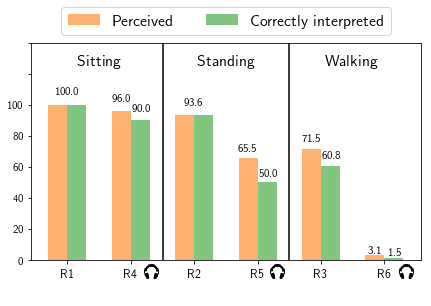

In [8]:
perceived_graph = [i * 100 for i in perceived]
correct_graph = [i * 100 for i in correct]

fig, ax = plt.subplots()
colors = ['#ff7f0e','#2ca02c']
x_label=['R1','R4','R2','R5','R3','R6']
index = np.arange(6)
width = 0.3

bar_perceived = ax.bar(index, perceived_graph ,align='center', alpha=0.6, width = width,color=colors[0])
bar_correct = ax.bar(index + width, correct_graph ,align='center', alpha=0.6, width = width,color=colors[1])
plt.yticks(np.arange(0, 150, step=20))

ax.set_xticks(index + width/2)
ax.set_xticklabels(x_label)


def autolabel(bar_data_one,bar_data_two,barchart):
    height_one = []
    height_two = []
    for i in range(len(bar_data_one)):
        height_one.append(bar_data_one[i])
        height_two.append(bar_data_two[i])
    i = 0
    for bar in barchart:
        if(height_one[i] == height_two[i]):
            ax.text(bar.get_x()+width/2 + bar.get_width()/2, 1.05* height_one[i],'%.1f' % float(height_one[i]), ha='center', va='bottom') 
        else:
            ax.text(bar.get_x() + bar.get_width()/2, 1.05* height_one[i],'%.1f' % float(height_one[i]), ha='center', va='bottom')
            ax.text(bar.get_x() + width + bar.get_width()/2 + 0.02, 1.05* height_two[i],'%.1f' % float(height_two[i]), ha='center', va='bottom')

        i += 1
        
ax.axes.yaxis.set_ticklabels([0,"20%","40%","60%","80%","100%"])    
    
autolabel(perceived_graph,correct_graph,bar_perceived)
ax.legend((bar_perceived, bar_correct), ('Perceived', 'Correctly interpreted'),loc=8,bbox_to_anchor=(0.5, 1),ncol=3) #

plt.axvline(x=1.65,color='k')
plt.axvline(x=3.65,color='k')


ax.text(0.3, 125, r'Sitting', fontsize=MEDIUM_SIZE)
ax.text(2.2, 125, r'Standing', fontsize=MEDIUM_SIZE)
ax.text(4.22, 125, r'Walking', fontsize=MEDIUM_SIZE)

import matplotlib.image as image
import os
from matplotlib.cbook import get_sample_data

dir_path = os.getcwd()

path_icon = os.getcwd() + '\\headphones_small.png'

im = plt.imread(get_sample_data(path_icon))

newax = fig.add_axes([0.34, 0.06, 0.05, 0.05,])
newax.imshow(im)
newax.axis('off')
newax2 = fig.add_axes([0.59, 0.06, 0.05, 0.05,])
newax2.imshow(im)
newax2.axis('off')
newax3 = fig.add_axes([0.845, 0.06, 0.05, 0.05,])
newax3.imshow(im)
newax3.axis('off')

fig.set_figwidth(7)
plt.savefig("Results_Prestudy.pdf", bbox_inches='tight')
plt.show()






In [9]:
# Auf deine Anfrage per Mail: Es wurden öfters lange Vibrationen für kurze gehalten

all_data = []
for i in range(1,13):
    values = data[str(i) + '_Kontrolle']
    for j in values:
        arr = j.split('-')
        for k in arr:
            all_data.append(k)

dict_all_data = Counter(all_data)        

print(dict_all_data)

Counter({'S': 230, 'L': 199, 'X(S)': 118, 'X(L)': 94, 'S(L)': 27, 'L(S)': 12, 'P(L)': 6, 'P(S)': 4})
